# Preliminaries

Import necessary packages:

In [151]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

# Apply default theme
sns.set_theme(style='whitegrid')

# Figures

### 1. Count of corporate bonds by sector

Load data from AWS: 

In [92]:
# Read data from AWS S3 (public access)
df = pd.read_csv("https://s3groupmorocco.s3.eu-central-1.amazonaws.com/data/CSPP_bonds_with_sectors.csv")
df.head()

,Unnamed: 0,MONTH,NCB,ISIN,ISSUER,MATURITY DATE,COUPON RATE,Match OpenPermID,SEARCH,Industry Group,Business Sector
0,0,2017/06,IT,XS1088274169,2i Rete Gas S.p.A.,16/07/2019,1.75,https://permid.org/1-5000936840,2I|2I RETE|2I RETE GAS SPA|2i Rete Gas S.p.A.,Natural Gas Utilities,Utilities
1,1,2017/06,IT,XS1088274672,2i Rete Gas S.p.A.,16/07/2024,3.0,https://permid.org/1-5000936840,2I|2I RETE|2I RETE GAS SPA|2i Rete Gas S.p.A.,Natural Gas Utilities,Utilities
2,2,2017/06,IT,XS1144492532,2i Rete Gas S.p.A.,02/01/2020,1.125,https://permid.org/1-5000936840,2I|2I RETE|2I RETE GAS SPA|2i Rete Gas S.p.A.,Natural Gas Utilities,Utilities
3,3,2017/06,IT,XS1571982468,2i Rete Gas S.p.A.,28/08/2026,1.75,https://permid.org/1-5000936840,2I|2I RETE|2I RETE GAS SPA|2i Rete Gas S.p.A.,Natural Gas Utilities,Utilities
4,4,2017/06,IT,XS0859920406,A2A S.p.A.,28/11/2019,4.5,https://permid.org/1-5000005309,A2A|A2A SPA|A2A SPA|A2A S.p.A.,Electric Utilities & IPPs,Utilities


How many industry groups?

In [93]:
df['Industry Group'].unique()

array(['Natural Gas Utilities', 'Electric Utilities & IPPs',
       'Machinery, Tools, Heavy Vehicles, Trains & Ships',
       'Transport Infrastructure', 'Multiline Utilities', 'Insurance',
       'Professional & Commercial Services', nan, 'Chemicals',
       'Aerospace & Defense', 'Residential & Commercial REITs',
       'Beverages', 'Oil & Gas',
       'Semiconductors & Semiconductor Equipment',
       'Real Estate Operations', 'Banking Services', 'Pharmaceuticals',
       'Media & Publishing', 'Construction & Engineering',
       'Software & IT Services', 'Telecommunications Services',
       'Investment Banking & Investment Services',
       'Automobiles & Auto Parts', 'Food & Tobacco',
       'Food & Drug Retailing', 'Passenger Transportation Services',
       'Freight&Logistics Services', 'Textiles & Apparel',
       'Oil & Gas Related Equipment and Services',
       'Homebuilding & Construction Supplies', 'Construction Materials',
       'Investment Holding Companies', 'Special

We will aggregate the industry groups (47 in total) present in this data to match those present in the greenhouse emissions data (8 in total). 

In [94]:
sectors = pd.read_csv("https://s3groupmorocco.s3.eu-central-1.amazonaws.com/data/greenhouse-gas-emissions-in-the-eu-28-1990-2018-by-sector.csv").columns[1:]
sectors

Index(['Energy supply', 'Transport', 'Industry', 'Agriculture',
       'Residential/commercial', 'International shipping',
       'International aviation', 'Waste'],
      dtype='object')

In [95]:
aggregation = {'Natural Gas Utilities':'Energy supply', 'Electric Utilities & IPPs':'Energy supply',
               'Machinery, Tools, Heavy Vehicles, Trains & Ships':'Industry', 'Transport Infrastructure':'Transport', 
               'Multiline Utilities':'Industry', 'Insurance':'Residential/commercial', 'Professional & Commercial Services':'Residential/commercial', 
               'Chemicals':'Industry', 'Aerospace & Defense':'Industry', 'Residential & Commercial REITs':'Residential/commercial',
               'Beverages':'Industry', 'Oil & Gas':'Energy supply', 'Semiconductors & Semiconductor Equipment':'Industry',
               'Real Estate Operations':'Residential/commercial', 'Banking Services':'Residential/commercial', 
               'Pharmaceuticals':'Industry', 'Media & Publishing':'Residential/commercial', 'Construction & Engineering':'Industry',
               'Software & IT Services':'Residential/commercial', 'Telecommunications Services':'Residential/commercial',
               'Investment Banking & Investment Services':'Residential/commercial', 'Automobiles & Auto Parts':'Industry', 
               'Food & Tobacco':'Agriculture', 'Food & Drug Retailing':'Agriculture', 'Passenger Transportation Services':'International aviation',
               'Freight&Logistics Services':'International shipping', 'Textiles & Apparel':'Industry', 'Oil & Gas Related Equipment and Services':'Energy supply',
               'Homebuilding & Construction Supplies':'Residential/commercial', 'Construction Materials':'Residential/commercial',
               'Investment Holding Companies':'Residential/commercial', 'Specialty Retailers':'Residential/commercial',
               'Hotels & Entertainment Services':'Residential/commercial', 'Water & Related Utilities':'Industry', 'Consumer Goods Conglomerates':'Industry', 
               'Household Goods':'Industry','Collective Investments':'Residential/commercial', 'Healthcare Equipment & Supplies':'Industry',
               'Paper & Forest Products':'Agriculture', 'Healthcare Providers & Services':'Residential/commercial', 'Communications & Networking':'Residential/commercial', 
               'Electronic Equipment & Parts':'Industry', 'Metals & Mining':'Industry', 'Containers & Packaging': 'Industry',
               'Financial Technology (Fintech) & Infrastructure':'Residential/commercial', 'Diversified Retail': 'Residential/commercial'}

df["Industry Group"].replace(aggregation, inplace=True)

Create new dataframe that contains the total number of bonds held by the ECB by sector:

In [131]:
df2 = df.groupby('Industry Group')['ISSUER'].count().add_suffix('').reset_index()
df2.sort_values('ISSUER', ascending = False, inplace = True)

Create a barchart:

Text(0.5, 1.0, 'Number of bonds held by ECB by sector')

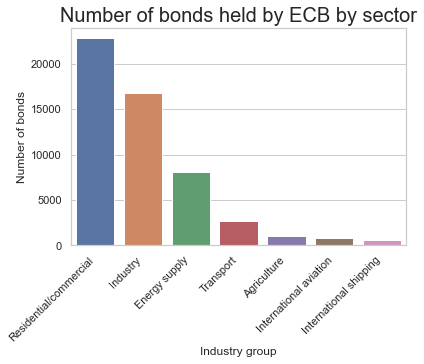

In [171]:
fig_1 = sns.barplot(x = 'Industry Group', y = 'ISSUER', data = df2)
fig_1.set_xticklabels(fig_1.get_xticklabels(), rotation=45, ha="right")
fig_1.set(xlabel = 'Industry group', ylabel = 'Number of bonds')
fig_1.axes.set_title("Number of bonds held by ECB by sector", fontsize=20)

### 2. CO2 emissions in the European Union from 1990 to 2018

Load data from AWS: 

In [145]:
# Read data from AWS S3 (public access)
df = pd.read_csv("https://s3groupmorocco.s3.eu-central-1.amazonaws.com/data/greenhouse-gas-emissions-in-the-eu-28-1990-2018-by-sector.csv", thousands=',')
df.head()

,year,Energy supply,Transport,Industry,Agriculture,Residential/commercial,International shipping,International aviation,Waste
0,1990,1590.9,672.7,1184.9,588.5,624.2,101.9,53.7,174.0
1,1991,1545.6,680.9,1110.3,557.0,663.4,100.2,53.0,177.0
2,1992,1495.0,703.0,1064.3,531.7,612.1,101.6,56.7,178.9
3,1993,1442.6,706.3,1033.0,523.6,621.9,102.5,59.6,179.3
4,1994,1446.6,711.5,1057.7,516.0,579.6,102.9,62.3,178.5


Prepare the data for the plot:

In [148]:
data = pd.melt(df, id_vars = 'year', var_name = 'sector', value_name = 'emission' )

Create a line chart:

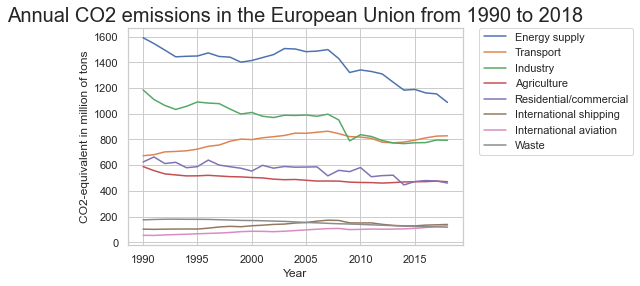

In [167]:
fig_2 = sns.lineplot(x = 'year', y = 'emission', hue = 'sector', data = data)
fig_2.set(xlabel = 'Year', ylabel = 'CO2-equivalent in million of tons')
fig_2.axes.set_title('Annual CO2 emissions in the European Union from 1990 to 2018', fontsize=20)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

### 3. ECB CSPP program

Load data from AWS:

In [161]:
# Read data from AWS S3 (public access)
df = pd.read_csv("https://s3groupmorocco.s3.eu-central-1.amazonaws.com/data/Industry.csv", thousands=',')
df.head()

,Quartal,Utilities,Infrastructure and transportation,Automotive and parts,Telecommunication,Energy and basic resources,Construction and materials,Real estate,Beverages,Technology,Chemicals,Health care and life science,Food,Insurance,Other sectors,Total Holdings
0,30.09.17,16%,12%,10%,9%,7%,6%,6%,5%,5%,5%,5%,4%,3%,8%,114658
1,31.03.18,15%,11%,9%,9%,6%,6%,6%,6%,5%,5%,5%,4%,3%,9%,148702
2,30.09.18,15%,11%,9%,9%,6%,6%,6%,6%,5%,5%,4%,4%,3%,9%,170378
3,31.03.19,15%,11%,9%,9%,6%,6%,6%,6%,5%,5%,4%,4%,3%,9%,177700
4,30.09.19,15%,12%,9%,9%,6%,6%,6%,6%,5%,5%,4%,4%,3%,9%,176937


Change date format:

In [162]:
df['Quartal'] = pd.to_datetime(df['Quartal'])
df['Quartal'] = df['Quartal'].dt.to_period("Q")
df.head()

,Quartal,Utilities,Infrastructure and transportation,Automotive and parts,Telecommunication,Energy and basic resources,Construction and materials,Real estate,Beverages,Technology,Chemicals,Health care and life science,Food,Insurance,Other sectors,Total Holdings
0,2017Q3,16%,12%,10%,9%,7%,6%,6%,5%,5%,5%,5%,4%,3%,8%,114658
1,2018Q1,15%,11%,9%,9%,6%,6%,6%,6%,5%,5%,5%,4%,3%,9%,148702
2,2018Q3,15%,11%,9%,9%,6%,6%,6%,6%,5%,5%,4%,4%,3%,9%,170378
3,2019Q1,15%,11%,9%,9%,6%,6%,6%,6%,5%,5%,4%,4%,3%,9%,177700
4,2019Q3,15%,12%,9%,9%,6%,6%,6%,6%,5%,5%,4%,4%,3%,9%,176937


Create a barchart:

Text(0.5, 1.0, 'ECB CSPP program')

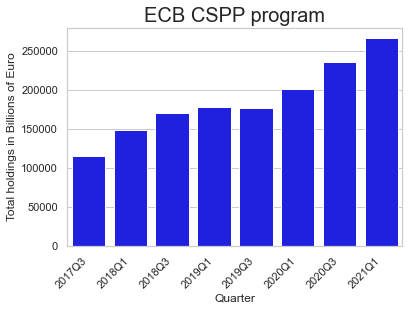

In [164]:
fig_3 = sns.barplot(x = 'Quartal', y = 'Total Holdings', data = df, color = 'blue')
fig_3.set_xticklabels(fig_3.get_xticklabels(), rotation=45, ha="right")
fig_3.set(xlabel = 'Quarter', ylabel = 'Total holdings in Billions of Euro')
fig_3.axes.set_title('ECB CSPP program', fontsize=20)